# <center> **Oxford Battery Data Analysis** </center>

---

**<center>Version: 1.0</center>**
**<center>License: CC BY 4.0</center>**
**<center> Author: Aravindan Natarajan </center>**

---



**<center>Atribution</center>**

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/anatarajank/Battery-Data-Analysis">Battery Data Analysis</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.linkedin.com/in/anatarajank/">Aravindan Natarajan</a> is licensed under <a href="https://creativecommons.org/licenses/by/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Creative Commons Attribution 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" alt=""><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" alt=""></a></p>

---

# **Meta Data Summary**

**Journal Article Name:** An Advanced Microstructural and Electrochemical Datasheet on 18650 Li-Ion Batteries with Nickel- Rich NMC811 Cathodes and Graphite-Silicon Anodes

**Journal Article Identifier:** https://dx.doi.org/10.1149/1945-7111/abc4c1

**Journal Article License:** CC BY 4.0

**Data URL:** https://rdr.ucl.ac.uk/articles/dataset/Lithium-ion_Battery_INR18650_MJ1_Data_400_Electrochemical_Cycles_EIL-015_/12159462/1

**Data License:** CC0 1.0

# **Some Common Formula**
---

**SOC Estimation from Capacity**

$$
SOC = (\frac {C_{t}}{C_{rated}}) *100
$$

where, $ C_{t} $ is the capacity at time t and $ C_{rated} $  is the rated capacity

---

# **1. Data Loading**

In [ ]:
# Basic Packages
import pandas as pd
import numpy as np

# Visulaization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Warning Handling
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Uncomment this line if you're using in Google Colab
#bat_data = pd.read_csv('/content/drive/MyDrive/Oxford Battery Data Analysis/data/EIL-MJ1-015.csv', header=0)

# Comment the below if you're running in Google Colab
bat_data = pd.read_csv(r'..data/EIL-MJ1-015.csv', header=0)

bat_data.head()

,Cycle,Charge Capacity,Discharge Capacity,Discharge/Charge,Unnamed: 4,Test Time,Cycle Number,Temp,Capacity,Cell Potential,...,Cycle Number.3,Temp.3,Capacity.3,Cell Potential.3,Unnamed: 28,Test Time.4,Cycle Number.4,Temp.4,Capacity.4,Cell Potential.4
0,-,Ah,Ah,%,NaN,Hrs,-,Deg C,AmpHr,Volts,...,-,Deg C,AmpHr,Volts,NaN,Hrs,-,Deg C,AmpHr,Volts
1,1,3.4700000,3.3700000,0.9710000,NaN,0.0000000,0,25.6901417,0.0000000,3.0659190,...,203,25.7239780,0.0000164,3.3179980,NaN,0.0000000,286,28.9489365,0.0000205,3.3799496
2,2,3.3800000,3.3700000,0.9970000,NaN,0.0027778,0,25.6901417,0.0000000,3.0656138,...,203,25.6907311,0.0000830,3.3350881,NaN,0.0027778,286,29.0154285,0.0000997,3.3949035
3,3,3.3700000,3.3600000,0.9970000,NaN,0.0027917,1,25.6901417,0.0000205,3.1651026,...,203,25.7073555,0.0002997,3.3459220,NaN,0.0027917,286,29.0154285,0.0004705,3.4052796
4,4,3.3600000,3.3500000,0.9970000,NaN,0.0028361,1,25.6901417,0.0000872,3.1860075,...,203,25.7073555,0.0016746,3.3562982,NaN,0.0028444,286,29.0154285,0.0022038,3.4155032


# **2. Some Useful Functions**

In [ ]:
# Function to split a dataframe containing cycle number, potential, and capacity columns into separate DataFrames based on cycle number
# Returns a dictionary with cycle numbers as keys and the corresponding dataframes as values.

def split_by_cycle_number(df):
  cycle_dfs = {}
  for cycle_number, group_df in df.groupby('Cycle Number'):
    cycle_dfs[cycle_number] = group_df.copy()
  return cycle_dfs

In [ ]:
# Function to separate charge and discharge cycles from a battery cycling dataframe containing capacity, voltage, and cycle number columns
# Returns two separate DataFrames: one containing charge cycles and another containing discharge cycles.

def separate_charge_discharge(df):

  # Identify charging based on two consecutive increasing capacities (may need adjustment)
  is_charging = (df['Cell Potential'].diff() >= -0.001) & (df['Cell Potential'].shift(1).diff() >= -0.001)

  charge_df = df[is_charging]
  discharge_df = df[~is_charging]
  return charge_df, discharge_df

In [ ]:
# Function to split a dataframe containing cycle number, potential, and capacity columns into separate dictionaries for charge and discharge data within each cycle.
# Returns two separate dictionaries: one containing charge and discharge dataFrames for each cycle number

def separate_charge_discharge_by_cycle(df):
  charge_data = {}
  discharge_data = {}
  for cycle_number, group_df in df.groupby('Cycle Number'):
    charge_df, discharge_df = separate_charge_discharge(group_df.copy())
    charge_data[cycle_number] = charge_df
    discharge_data[cycle_number] = discharge_df
  return charge_data, discharge_data

# **3. Data Preprocessing**

In [ ]:
bat_data.drop([0], inplace=True)
bat_data.head()

,Cycle,Charge Capacity,Discharge Capacity,Discharge/Charge,Unnamed: 4,Test Time,Cycle Number,Temp,Capacity,Cell Potential,...,Cycle Number.3,Temp.3,Capacity.3,Cell Potential.3,Unnamed: 28,Test Time.4,Cycle Number.4,Temp.4,Capacity.4,Cell Potential.4
1,1,3.4700000,3.3700000,0.9710000,NaN,0.0000000,0,25.6901417,0.0000000,3.0659190,...,203,25.7239780,0.0000164,3.3179980,NaN,0.0000000,286,28.9489365,0.0000205,3.3799496
2,2,3.3800000,3.3700000,0.9970000,NaN,0.0027778,0,25.6901417,0.0000000,3.0656138,...,203,25.6907311,0.0000830,3.3350881,NaN,0.0027778,286,29.0154285,0.0000997,3.3949035
3,3,3.3700000,3.3600000,0.9970000,NaN,0.0027917,1,25.6901417,0.0000205,3.1651026,...,203,25.7073555,0.0002997,3.3459220,NaN,0.0027917,286,29.0154285,0.0004705,3.4052796
4,4,3.3600000,3.3500000,0.9970000,NaN,0.0028361,1,25.6901417,0.0000872,3.1860075,...,203,25.7073555,0.0016746,3.3562982,NaN,0.0028444,286,29.0154285,0.0022038,3.4155032
5,5,3.3500000,3.3400000,0.9970000,NaN,0.0029167,1,25.6901417,0.0002080,3.1982147,...,203,25.7073555,0.0038620,3.3665217,NaN,0.0030917,286,28.9821816,0.0048662,3.4258793


In [ ]:
bat_data.reset_index(drop=True, inplace=True)
bat_data.head()

,Cycle,Charge Capacity,Discharge Capacity,Discharge/Charge,Unnamed: 4,Test Time,Cycle Number,Temp,Capacity,Cell Potential,...,Cycle Number.3,Temp.3,Capacity.3,Cell Potential.3,Unnamed: 28,Test Time.4,Cycle Number.4,Temp.4,Capacity.4,Cell Potential.4
0,1,3.4700000,3.3700000,0.9710000,NaN,0.0000000,0,25.6901417,0.0000000,3.0659190,...,203,25.7239780,0.0000164,3.3179980,NaN,0.0000000,286,28.9489365,0.0000205,3.3799496
1,2,3.3800000,3.3700000,0.9970000,NaN,0.0027778,0,25.6901417,0.0000000,3.0656138,...,203,25.6907311,0.0000830,3.3350881,NaN,0.0027778,286,29.0154285,0.0000997,3.3949035
2,3,3.3700000,3.3600000,0.9970000,NaN,0.0027917,1,25.6901417,0.0000205,3.1651026,...,203,25.7073555,0.0002997,3.3459220,NaN,0.0027917,286,29.0154285,0.0004705,3.4052796
3,4,3.3600000,3.3500000,0.9970000,NaN,0.0028361,1,25.6901417,0.0000872,3.1860075,...,203,25.7073555,0.0016746,3.3562982,NaN,0.0028444,286,29.0154285,0.0022038,3.4155032
4,5,3.3500000,3.3400000,0.9970000,NaN,0.0029167,1,25.6901417,0.0002080,3.1982147,...,203,25.7073555,0.0038620,3.3665217,NaN,0.0030917,286,28.9821816,0.0048662,3.4258793


In [ ]:
bat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52957 entries, 0 to 52956
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cycle               400 non-null    object 
 1   Charge Capacity     400 non-null    object 
 2   Discharge Capacity  400 non-null    object 
 3   Discharge/Charge    400 non-null    object 
 4   Unnamed: 4          0 non-null      float64
 5   Test Time           34454 non-null  object 
 6   Cycle Number        34454 non-null  object 
 7   Temp                34454 non-null  object 
 8   Capacity            34454 non-null  object 
 9   Cell Potential      34454 non-null  object 
 10  Unnamed: 10         0 non-null      float64
 11  Test Time.1         13721 non-null  object 
 12  Cycle Number.1      13719 non-null  object 
 13  Temp.1              13721 non-null  object 
 14  Capacity.1          13719 non-null  object 
 15  Cell Potential.1    13719 non-null  object 
 16  Unna

In [ ]:
unnamed_cols = [col for col in bat_data.columns if 'Unnamed' in col]
print(unnamed_cols)

['Unnamed: 4', 'Unnamed: 10', 'Unnamed: 16', 'Unnamed: 22', 'Unnamed: 28']


In [ ]:
bat_data = bat_data.astype(dtype='float64')

In [ ]:
bat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52957 entries, 0 to 52956
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cycle               400 non-null    float64
 1   Charge Capacity     400 non-null    float64
 2   Discharge Capacity  400 non-null    float64
 3   Discharge/Charge    400 non-null    float64
 4   Unnamed: 4          0 non-null      float64
 5   Test Time           34454 non-null  float64
 6   Cycle Number        34454 non-null  float64
 7   Temp                34454 non-null  float64
 8   Capacity            34454 non-null  float64
 9   Cell Potential      34454 non-null  float64
 10  Unnamed: 10         0 non-null      float64
 11  Test Time.1         13721 non-null  float64
 12  Cycle Number.1      13719 non-null  float64
 13  Temp.1              13721 non-null  float64
 14  Capacity.1          13719 non-null  float64
 15  Cell Potential.1    13719 non-null  float64
 16  Unna

In [ ]:
bat_summary_df = bat_data[['Cycle', 'Charge Capacity', 'Discharge Capacity', 'Discharge/Charge']].copy()
bat_summary_df.head()

,Cycle,Charge Capacity,Discharge Capacity,Discharge/Charge
0,1.0,3.47,3.37,0.971
1,2.0,3.38,3.37,0.997
2,3.0,3.37,3.36,0.997
3,4.0,3.36,3.35,0.997
4,5.0,3.35,3.34,0.997


In [ ]:
cycle1_data = pd.DataFrame(bat_data[['Test Time', 'Cycle Number', 'Temp', 'Capacity','Cell Potential']])
cycle1_data.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,0.0,25.690142,0.000000,3.065919
1,0.002778,0.0,25.690142,0.000000,3.065614
2,0.002792,1.0,25.690142,0.000021,3.165103
3,0.002836,1.0,25.690142,0.000087,3.186008
4,0.002917,1.0,25.690142,0.000208,3.198215


In [ ]:
cycle1_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Test Time,34454.0,172.657689,99.646035,0.000000,86.730477,172.767638,258.166271,352.960086
Cycle Number,34454.0,44.295873,25.440982,0.000000,22.000000,44.000000,67.000000,85.000000
Temp,34454.0,27.743439,3.336833,24.795521,25.945747,26.425007,28.102421,41.921673
Capacity,34454.0,1.484761,1.260353,0.000000,0.047253,1.396765,2.862401,3.474988
Cell Potential,34454.0,3.502952,0.495142,2.499809,3.081636,3.536431,3.923476,4.200885


In [ ]:
cycle2_data = pd.DataFrame(bat_data[['Test Time.1', 'Cycle Number.1', 'Temp.1', 'Capacity.1','Cell Potential.1']])
cycle2_data.head()

,Test Time.1,Cycle Number.1,Temp.1,Capacity.1,Cell Potential.1
0,0.000000,86.0,26.937492,0.000016,3.255589
1,0.002778,86.0,31.082670,0.000083,3.274815
2,0.002789,86.0,31.214361,0.000220,3.286259
3,0.002833,86.0,31.247282,0.001079,3.296483
4,0.002925,86.0,31.296665,0.002870,3.306554


In [ ]:
cycle2_data.columns

Index(['Test Time.1', 'Cycle Number.1', 'Temp.1', 'Capacity.1',
       'Cell Potential.1'],
      dtype='object')

In [ ]:
cycle2_data_dict = {'Test Time.1':'Test Time', 'Cycle Number.1': 'Cycle Number', 'Temp.1': 'Temp', 'Capacity.1': 'Capacity','Cell Potential.1': 'Cell Potential'}
cycle2_data.rename(columns=cycle2_data_dict, inplace=True)
cycle2_data.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,86.0,26.937492,0.000016,3.255589
1,0.002778,86.0,31.082670,0.000083,3.274815
2,0.002789,86.0,31.214361,0.000220,3.286259
3,0.002833,86.0,31.247282,0.001079,3.296483
4,0.002925,86.0,31.296665,0.002870,3.306554


In [ ]:
cycle3_data = pd.DataFrame(bat_data[['Test Time.2', 'Cycle Number.2', 'Temp.2', 'Capacity.2','Cell Potential.2']])
cycle3_data.head()

,Test Time.2,Cycle Number.2,Temp.2,Capacity.2,Cell Potential.2
0,0.000000,110.0,24.693321,0.000016,3.354162
1,0.002778,110.0,24.743193,0.000087,3.370337
2,0.002789,110.0,24.759815,0.000362,3.380713
3,0.002833,110.0,24.759815,0.001954,3.391089
4,0.002978,110.0,24.759815,0.004466,3.401312


In [ ]:
cycle3_data_dict = {'Test Time.2':'Test Time', 'Cycle Number.2': 'Cycle Number', 'Temp.2': 'Temp', 'Capacity.2': 'Capacity','Cell Potential.2': 'Cell Potential'}
cycle3_data.rename(columns=cycle3_data_dict, inplace=True)
cycle3_data.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,110.0,24.693321,0.000016,3.354162
1,0.002778,110.0,24.743193,0.000087,3.370337
2,0.002789,110.0,24.759815,0.000362,3.380713
3,0.002833,110.0,24.759815,0.001954,3.391089
4,0.002978,110.0,24.759815,0.004466,3.401312


In [ ]:
cycle4_data = pd.DataFrame(bat_data[['Test Time.3', 'Cycle Number.3', 'Temp.3', 'Capacity.3','Cell Potential.3']])
cycle4_data.head()

,Test Time.3,Cycle Number.3,Temp.3,Capacity.3,Cell Potential.3
0,0.000000,203.0,25.723978,0.000016,3.317998
1,0.002778,203.0,25.690731,0.000083,3.335088
2,0.002789,203.0,25.707355,0.000300,3.345922
3,0.002836,203.0,25.707355,0.001675,3.356298
4,0.003019,203.0,25.707355,0.003862,3.366522


In [ ]:
cycle4_data_dict = {'Test Time.3':'Test Time', 'Cycle Number.3': 'Cycle Number', 'Temp.3': 'Temp', 'Capacity.3': 'Capacity','Cell Potential.3': 'Cell Potential'}
cycle4_data.rename(columns=cycle4_data_dict, inplace=True)
cycle4_data.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,203.0,25.723978,0.000016,3.317998
1,0.002778,203.0,25.690731,0.000083,3.335088
2,0.002789,203.0,25.707355,0.000300,3.345922
3,0.002836,203.0,25.707355,0.001675,3.356298
4,0.003019,203.0,25.707355,0.003862,3.366522


In [ ]:
cycle5_data = pd.DataFrame(bat_data[['Test Time.4', 'Cycle Number.4', 'Temp.4', 'Capacity.4','Cell Potential.4']])
cycle5_data.head()

,Test Time.4,Cycle Number.4,Temp.4,Capacity.4,Cell Potential.4
0,0.000000,286.0,28.948936,0.000021,3.379950
1,0.002778,286.0,29.015428,0.000100,3.394903
2,0.002792,286.0,29.015428,0.000470,3.405280
3,0.002844,286.0,29.015428,0.002204,3.415503
4,0.003092,286.0,28.982182,0.004866,3.425879


In [ ]:
cycle5_data_dict = {'Test Time.4':'Test Time', 'Cycle Number.4': 'Cycle Number', 'Temp.4': 'Temp', 'Capacity.4': 'Capacity','Cell Potential.4': 'Cell Potential'}
cycle5_data.rename(columns=cycle5_data_dict, inplace=True)
cycle5_data.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,286.0,28.948936,0.000021,3.379950
1,0.002778,286.0,29.015428,0.000100,3.394903
2,0.002792,286.0,29.015428,0.000470,3.405280
3,0.002844,286.0,29.015428,0.002204,3.415503
4,0.003092,286.0,28.982182,0.004866,3.425879


In [ ]:
bat_df_list = [cycle1_data, cycle2_data, cycle3_data, cycle4_data, cycle5_data]
bat_df_full = pd.concat(bat_df_list, ignore_index=True)
bat_df_full.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,0.0,25.690142,0.000000,3.065919
1,0.002778,0.0,25.690142,0.000000,3.065614
2,0.002792,1.0,25.690142,0.000021,3.165103
3,0.002836,1.0,25.690142,0.000087,3.186008
4,0.002917,1.0,25.690142,0.000208,3.198215


In [ ]:
bat_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264785 entries, 0 to 264784
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Test Time       177397 non-null  float64
 1   Cycle Number    168531 non-null  float64
 2   Temp            168539 non-null  float64
 3   Capacity        168531 non-null  float64
 4   Cell Potential  168531 non-null  float64
dtypes: float64(5)
memory usage: 10.1 MB


In [ ]:
bat_df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
Test Time,177397.0,196.282548,128.148121,0.000000,86.785586,183.142967,291.165253,542.615153
Cycle Number,168531.0,199.575710,113.239594,0.000000,105.000000,202.000000,291.000000,400.000000
Temp,168539.0,27.931864,2.638524,23.130714,26.056448,26.888292,29.347898,42.920246
Capacity,168531.0,1.350260,1.206779,0.000000,0.003528,1.218937,2.678648,3.474988
Cell Potential,168531.0,3.498240,0.486182,2.499809,3.134890,3.489204,3.912566,4.200885


In [ ]:
cycle_dfs = split_by_cycle_number(bat_df_full.copy())

In [ ]:
cycle_dfs.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 

In [ ]:
cycle_dfs[0.0].head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,0.0,25.690142,0.0,3.065919
1,0.002778,0.0,25.690142,0.0,3.065614


In [ ]:
cycle_dfs[1.0].head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
2,0.002792,1.0,25.690142,0.000021,3.165103
3,0.002836,1.0,25.690142,0.000087,3.186008
4,0.002917,1.0,25.690142,0.000208,3.198215
5,0.003178,1.0,25.690142,0.000600,3.208743
6,0.003711,1.0,25.690142,0.001400,3.219120


In [ ]:
cycle_dfs[1.0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 2 to 408
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       407 non-null    float64
 1   Cycle Number    407 non-null    float64
 2   Temp            407 non-null    float64
 3   Capacity        407 non-null    float64
 4   Cell Potential  407 non-null    float64
dtypes: float64(5)
memory usage: 19.1 KB


In [ ]:
charge_data, discharge_data = separate_charge_discharge_by_cycle(bat_df_full)

In [ ]:
charge_data.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 

In [ ]:
charge_data[1.0].head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
4,0.002917,1.0,25.690142,0.000208,3.198215
5,0.003178,1.0,25.690142,0.000600,3.208743
6,0.003711,1.0,25.690142,0.001400,3.219120
7,0.004450,1.0,25.706116,0.002508,3.229648
8,0.005358,1.0,25.690142,0.003870,3.239719


In [ ]:
charge_data[1.0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 4 to 408
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Test Time       242 non-null    float64
 1   Cycle Number    242 non-null    float64
 2   Temp            242 non-null    float64
 3   Capacity        242 non-null    float64
 4   Cell Potential  242 non-null    float64
dtypes: float64(5)
memory usage: 11.3 KB


# **4.Data Visualization**

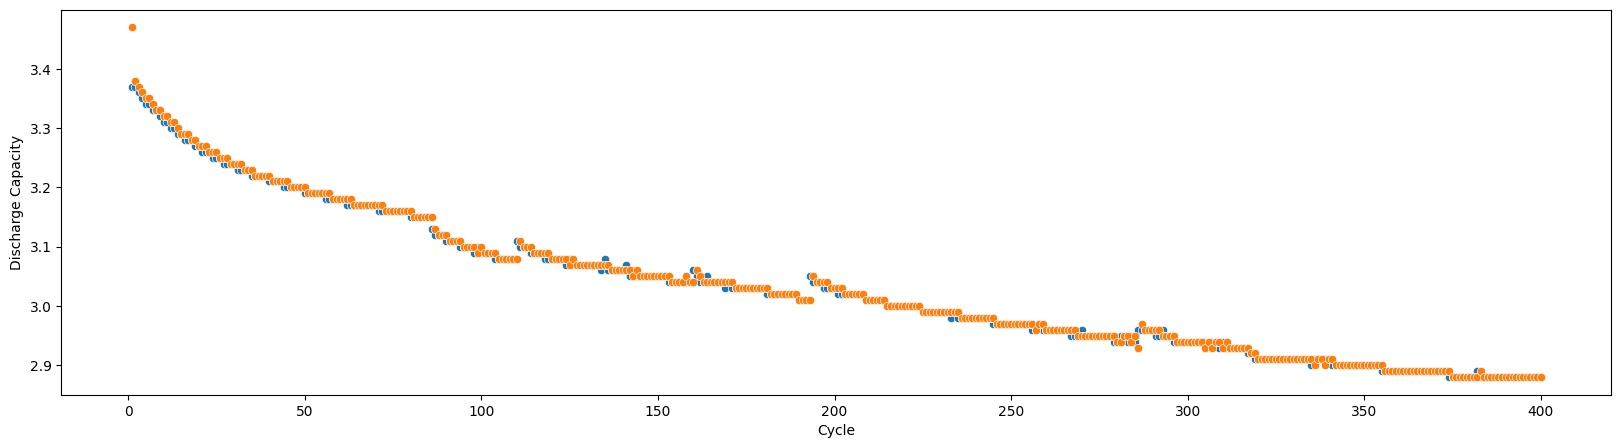

In [ ]:
# Visualize capacity fade
plt.figure(figsize=(20,5))
sns.scatterplot(data=bat_data, x='Cycle',y='Discharge Capacity')
sns.scatterplot(data=bat_data, x='Cycle',y='Charge Capacity')
plt.show()

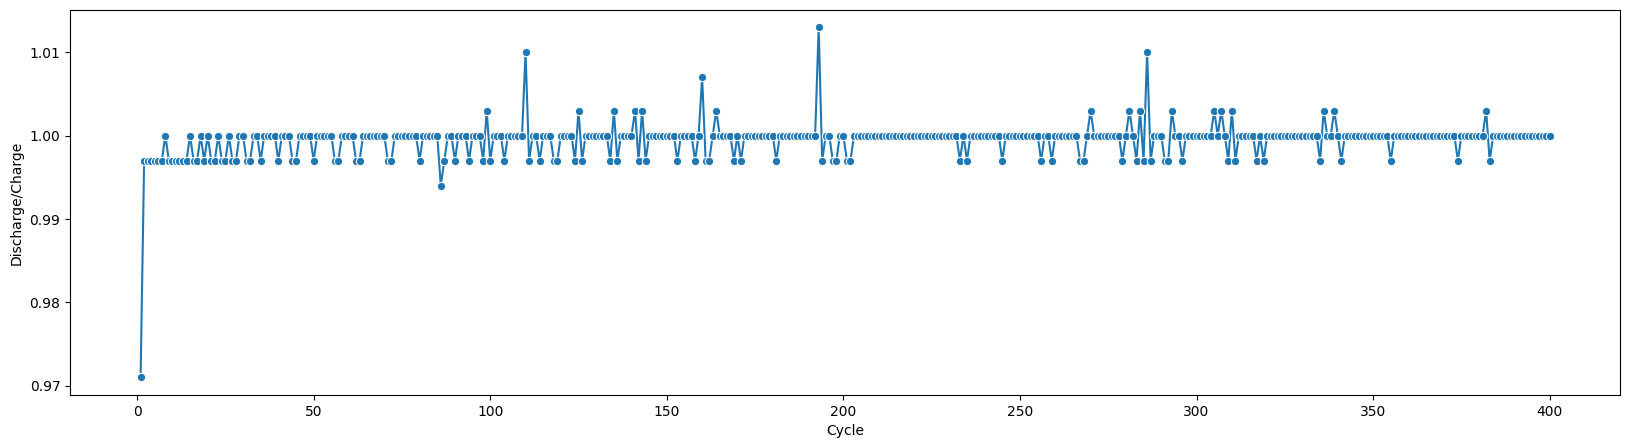

In [ ]:
# Visualize charge/discharge ratio
plt.figure(figsize=(20,5))
sns.lineplot(data=bat_data, x='Cycle',y='Discharge/Charge', marker='o')
plt.show()

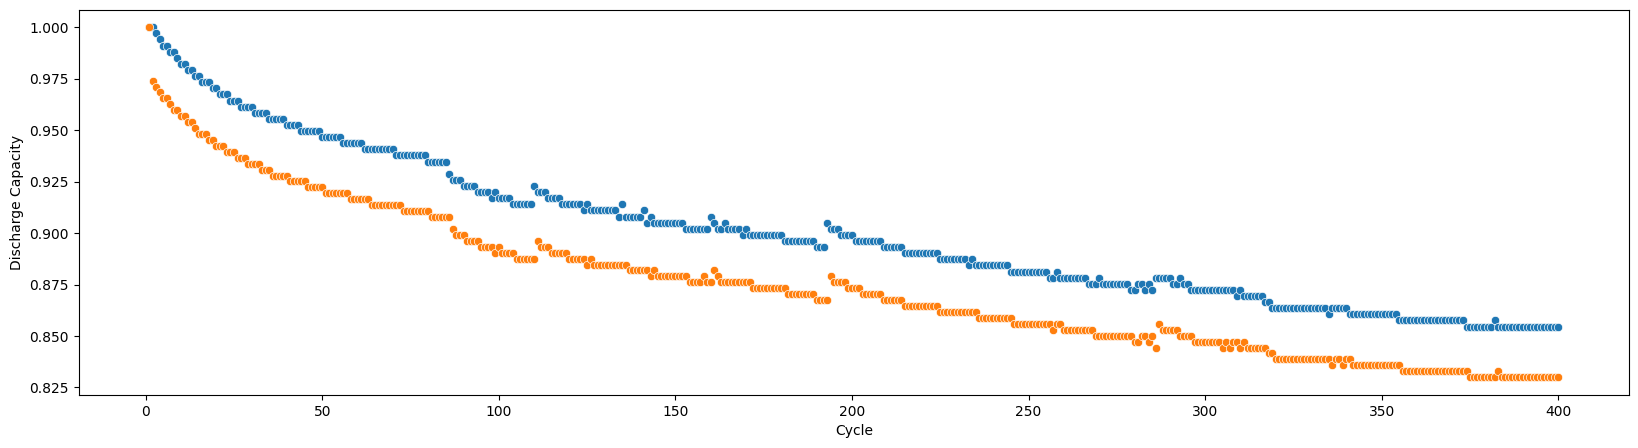

In [ ]:
# Visualize capacity fade as a percentage change
plt.figure(figsize=(20,5))
sns.scatterplot(data=bat_data, x='Cycle',y=(bat_data['Discharge Capacity']/bat_data['Discharge Capacity'][0]))
sns.scatterplot(data=bat_data, x='Cycle',y=(bat_data['Charge Capacity']/bat_data['Charge Capacity'][0]))
plt.show()

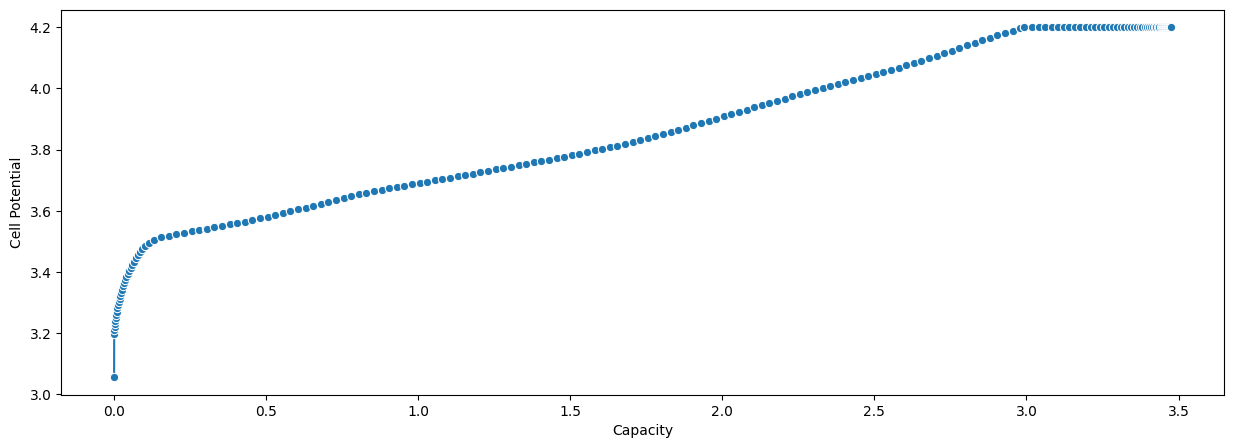

In [ ]:
# Visualize cell potential vs. charge capacity
plt.figure(figsize=(15,5))
sns.lineplot(data= charge_data[1.0], x=charge_data[1.0]['Capacity'],y=charge_data[1.0]['Cell Potential'], marker='o', errorbar=None)
plt.show()

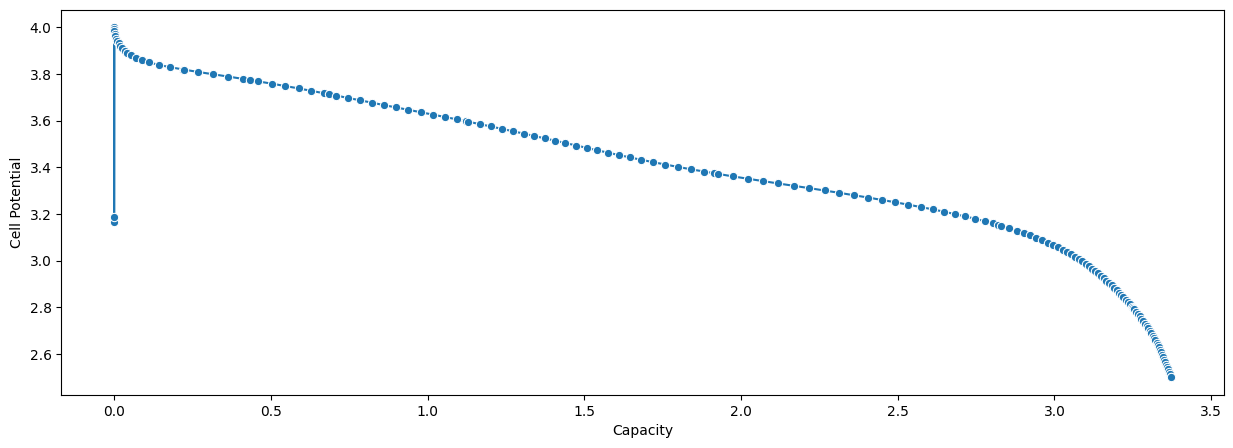

In [ ]:
# Visualize cell potential vs. discharge capacity
plt.figure(figsize=(15,5))
sns.lineplot(data= discharge_data[1.0], x=discharge_data[1.0]['Capacity'],y=discharge_data[1.0]['Cell Potential'], marker='o', errorbar=None)
plt.show()

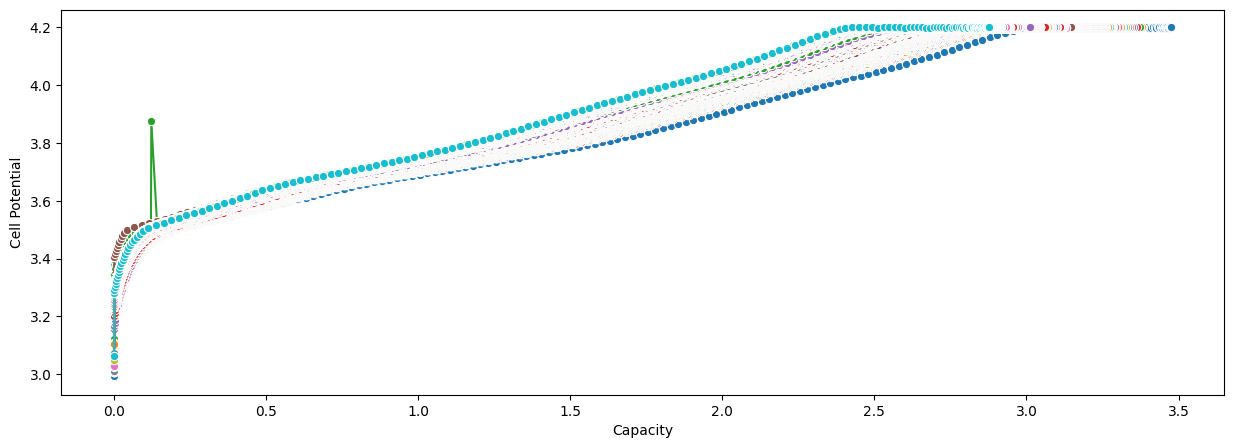

In [ ]:
plt.figure(figsize=(15,5))
for key in charge_data.keys():
    sns.lineplot(data= charge_data[key], x=charge_data[key]['Capacity'],y=charge_data[key]['Cell Potential'], marker='o', errorbar=None)
plt.show()

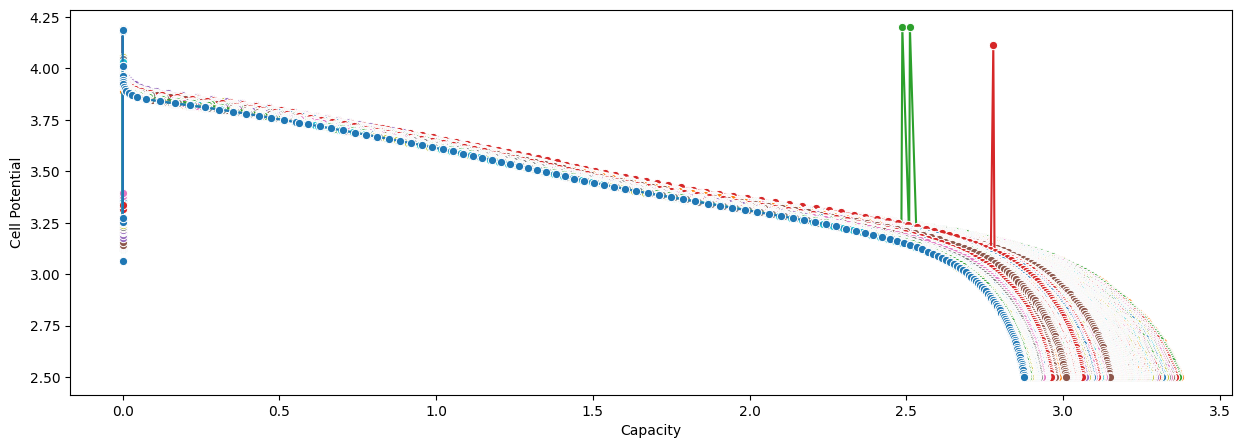

In [ ]:
plt.figure(figsize=(15,5))
for key in discharge_data.keys():
    sns.lineplot(data= discharge_data[key], x=discharge_data[key]['Capacity'],y=discharge_data[key]['Cell Potential'], marker='o', errorbar=None)
plt.show()

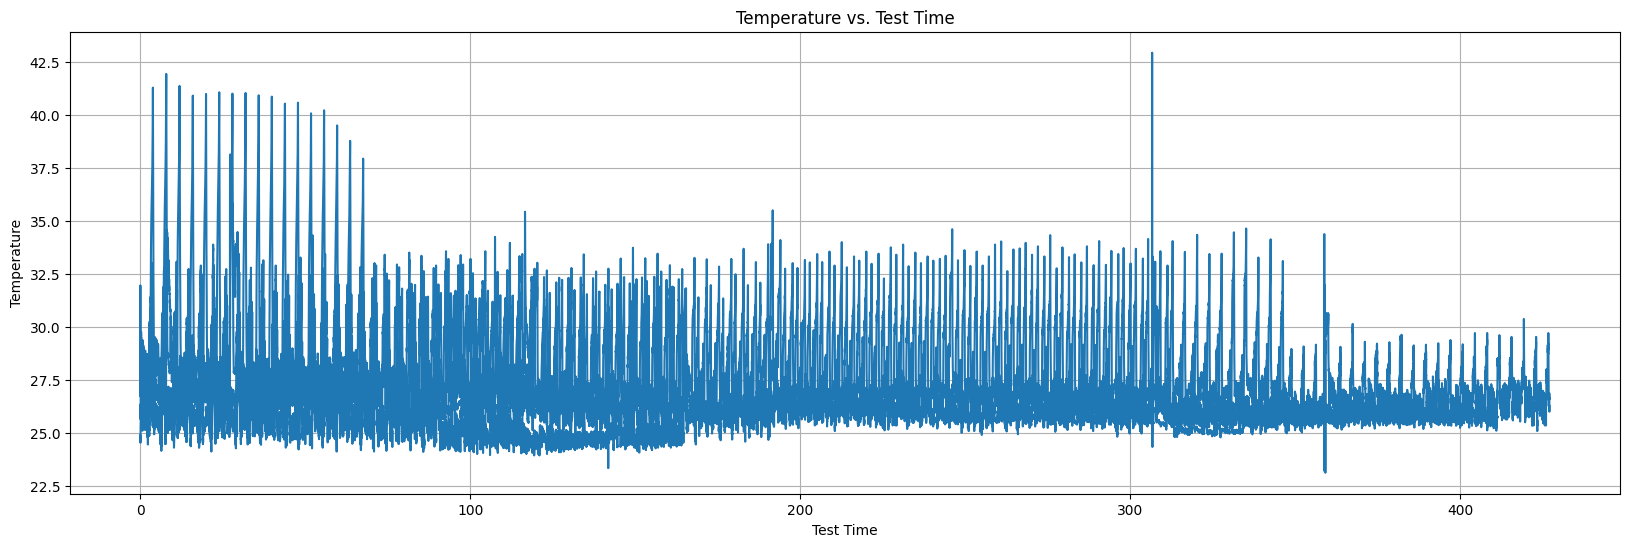

In [ ]:
# Visualize Temperature vs. Time
plt.figure(figsize=(20, 6))
plt.plot(bat_df_full['Test Time'], bat_df_full['Temp'])
plt.xlabel("Test Time")
plt.ylabel("Temperature")
plt.title("Temperature vs. Test Time")
plt.grid(True)
plt.show()

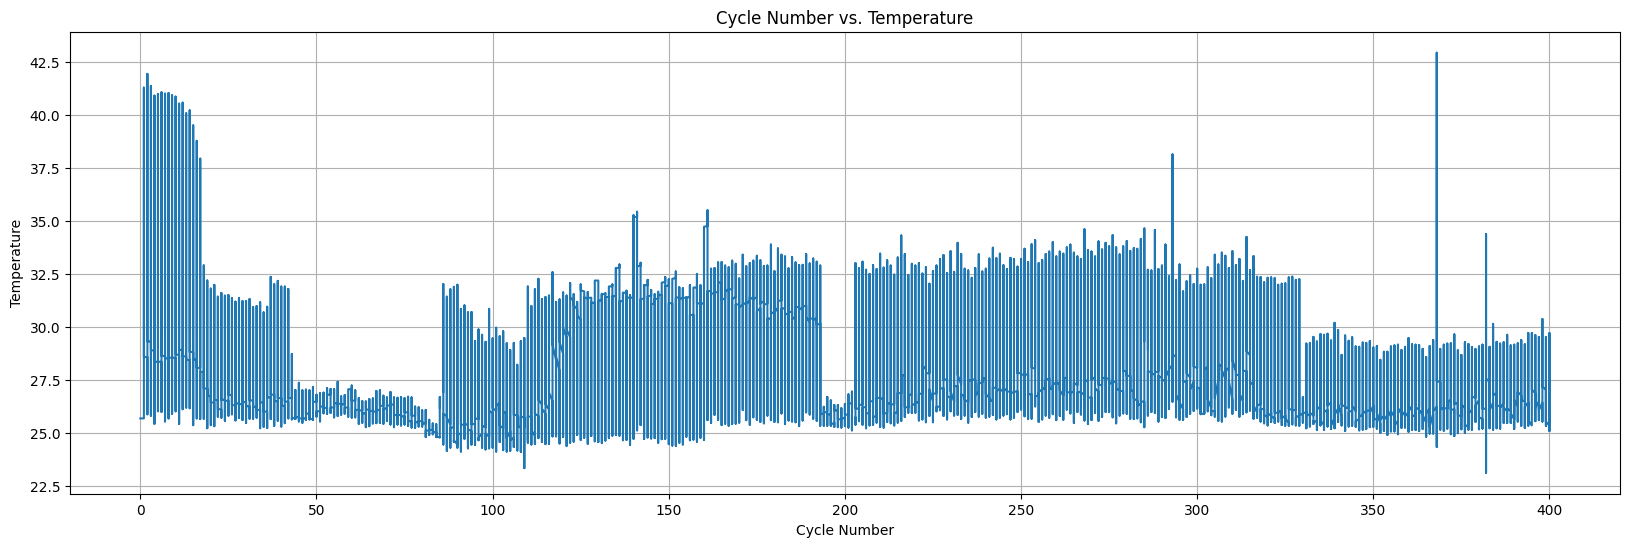

In [ ]:
# Visualize Temperature vs. Cycle number
plt.figure(figsize=(20, 6))
plt.plot(bat_df_full['Cycle Number'], bat_df_full['Temp'])
plt.xlabel("Cycle Number")
plt.ylabel("Temperature")
plt.title("Cycle Number vs. Temperature")
plt.grid(True)
plt.show()

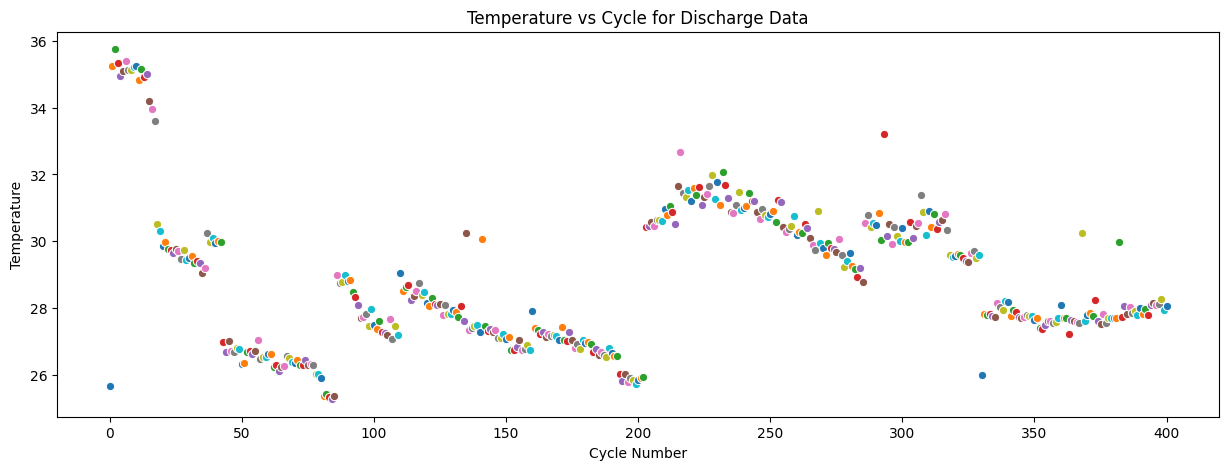

In [ ]:
# Plot for temperature vs cycle for the discharge_data
plt.figure(figsize=(15,5))
for key in discharge_data.keys():
    sns.lineplot(data=discharge_data[key], x='Cycle Number', y='Temp', marker='o', errorbar=None)
plt.xlabel("Cycle Number")
plt.ylabel("Temperature")
plt.title("Temperature vs Cycle for Discharge Data")
plt.show()

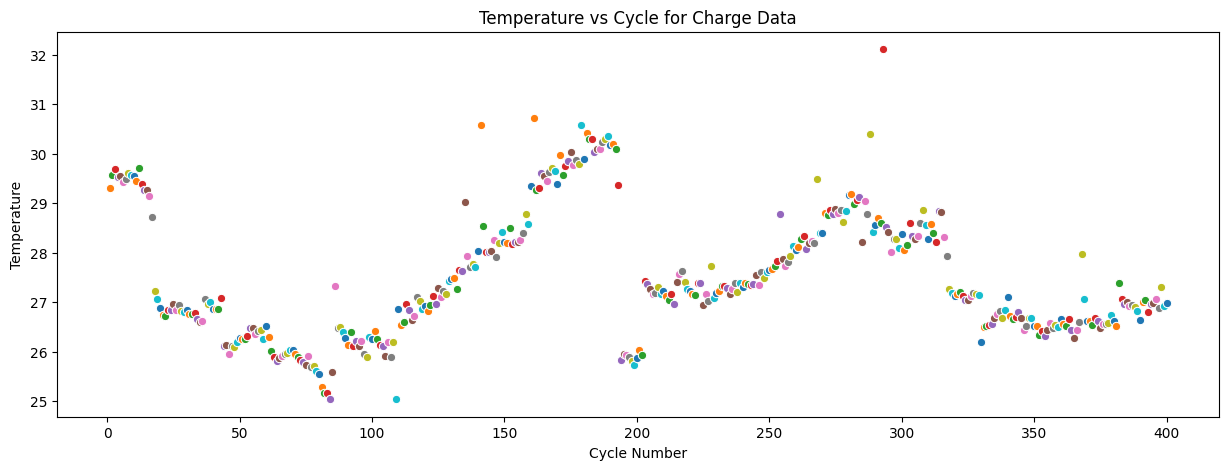

In [ ]:
# Plot for temperature vs cycle for the charge_data
plt.figure(figsize=(15,5))
for key in discharge_data.keys():
    sns.lineplot(data=charge_data[key], x='Cycle Number', y='Temp', marker='o', errorbar=None)
plt.xlabel("Cycle Number")
plt.ylabel("Temperature")
plt.title("Temperature vs Cycle for Charge Data")
plt.show()

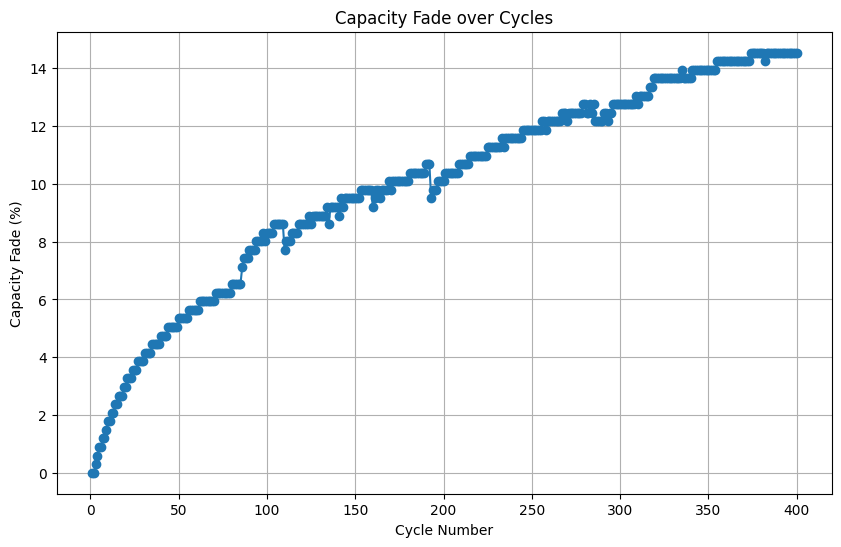

In [ ]:
# Visualize capacity fade for discharge data
initial_capacity = bat_summary_df['Discharge Capacity'].iloc[0]  # Capacity at the first cycle

# Calculate capacity fade for each cycle
bat_summary_df['Capacity Fade'] = (initial_capacity - bat_summary_df['Discharge Capacity']) / initial_capacity * 100

# Plotting capacity fade
plt.figure(figsize=(10, 6))
plt.plot(bat_summary_df['Cycle'], bat_summary_df['Capacity Fade'], marker='o')
plt.xlabel("Cycle Number")
plt.ylabel("Capacity Fade (%)")
plt.title("Capacity Fade over Cycles")
plt.grid(True)
plt.show()

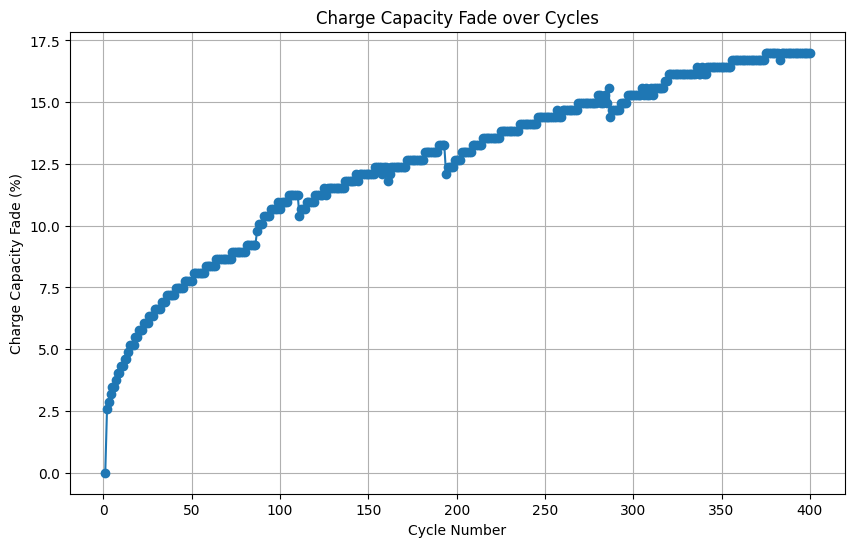

In [ ]:
# Visualize capacity fade for discharge data
initial_charge_capacity = bat_summary_df['Charge Capacity'].iloc[0]  # Capacity at the first cycle

# Calculate charge capacity fade for each cycle
bat_summary_df['Charge Capacity Fade'] = (initial_charge_capacity - bat_summary_df['Charge Capacity']) / initial_charge_capacity * 100

# Plotting charge capacity fade
plt.figure(figsize=(10, 6))
plt.plot(bat_summary_df['Cycle'], bat_summary_df['Charge Capacity Fade'], marker='o')
plt.xlabel("Cycle Number")
plt.ylabel("Charge Capacity Fade (%)")
plt.title("Charge Capacity Fade over Cycles")
plt.grid(True)
plt.show()

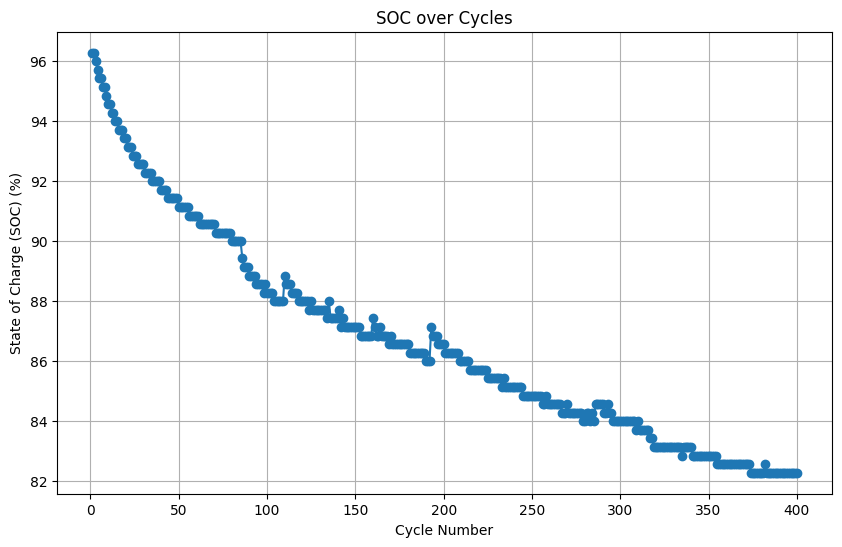

In [ ]:
# SOC calculation and visualization
rated_capacity = 3.5  # Maximum rated capacity in Ah

# Calculate SOC for each cycle
bat_summary_df['SOC'] = (bat_summary_df['Discharge Capacity'] / rated_capacity) * 100

# Plotting the SOC over cycles
plt.figure(figsize=(10, 6))
plt.plot(bat_summary_df['Cycle'], bat_summary_df['SOC'], marker='o')
plt.xlabel("Cycle Number")
plt.ylabel("State of Charge (SOC) (%)")
plt.title("SOC over Cycles")
plt.grid(True)
plt.show()

In [ ]:
# Concatenate all DataFrames in discharge_data
discharge_df = pd.concat(discharge_data.values(), ignore_index=True)

# Reset the index
discharge_df.reset_index(drop=True, inplace=True)

# Visualize the dataframe
discharge_df.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.000000,0.0,25.690142,0.000000,3.065919
1,0.002778,0.0,25.690142,0.000000,3.065614
2,0.002792,1.0,25.690142,0.000021,3.165103
3,0.002836,1.0,25.690142,0.000087,3.186008
4,2.785850,1.0,26.217327,0.000000,4.195849


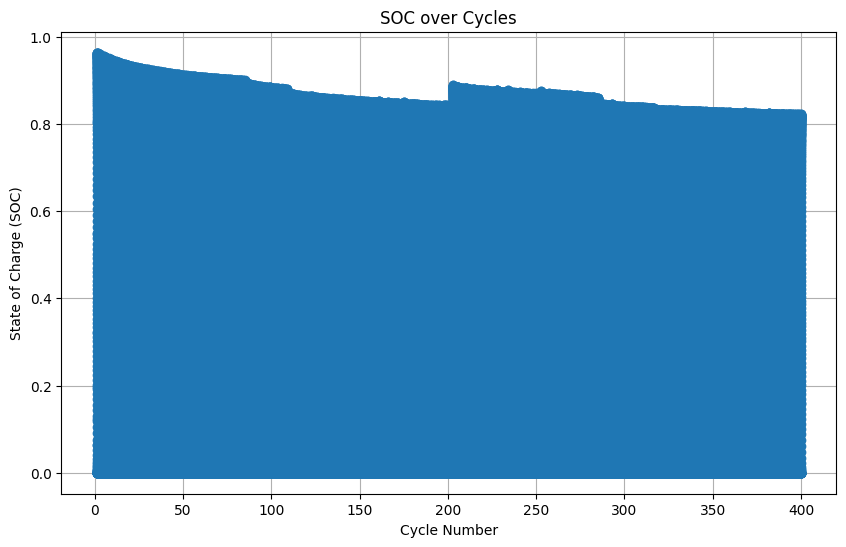

In [ ]:
# Calculate SOC for each cycle for discharge data
discharge_df['SOC'] = (discharge_df['Capacity'][2:]/ rated_capacity)

# Visualization of the SOC over cycles for discharge data
plt.figure(figsize=(10, 6))
plt.plot(discharge_df['Cycle Number'], discharge_df['SOC'], marker='o')
plt.xlabel("Cycle Number")
plt.ylabel("State of Charge (SOC)")
plt.title("SOC over Cycles")
plt.grid(True)
plt.show()

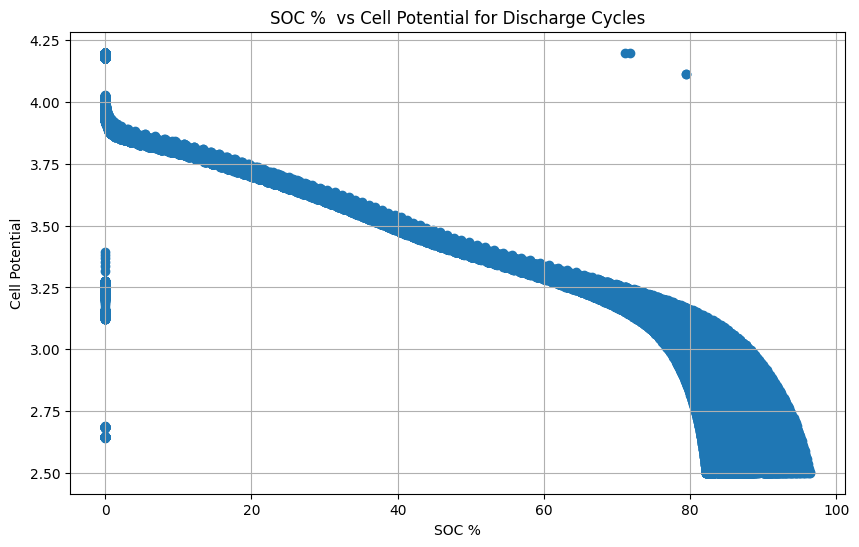

In [ ]:
# Visualization of cell potential vs. SOC for discharge data
plt.figure(figsize=(10, 6))
plt.scatter(discharge_df['SOC']*100,discharge_df['Cell Potential'], marker='o')
plt.xlabel("SOC %")
plt.ylabel("Cell Potential")
plt.title("SOC %  vs Cell Potential for Discharge Cycles")
plt.grid(True)
plt.show()


In [ ]:
# Concatenate all DataFrames in discharge_data
charge_df = pd.concat(charge_data.values(), ignore_index=True)

# Reset the index
charge_df.reset_index(drop=True, inplace=True)

# Visualize the dataframe
charge_df.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential
0,0.002917,1.0,25.690142,0.000208,3.198215
1,0.003178,1.0,25.690142,0.000600,3.208743
2,0.003711,1.0,25.690142,0.001400,3.219120
3,0.004450,1.0,25.706116,0.002508,3.229648
4,0.005358,1.0,25.690142,0.003870,3.239719


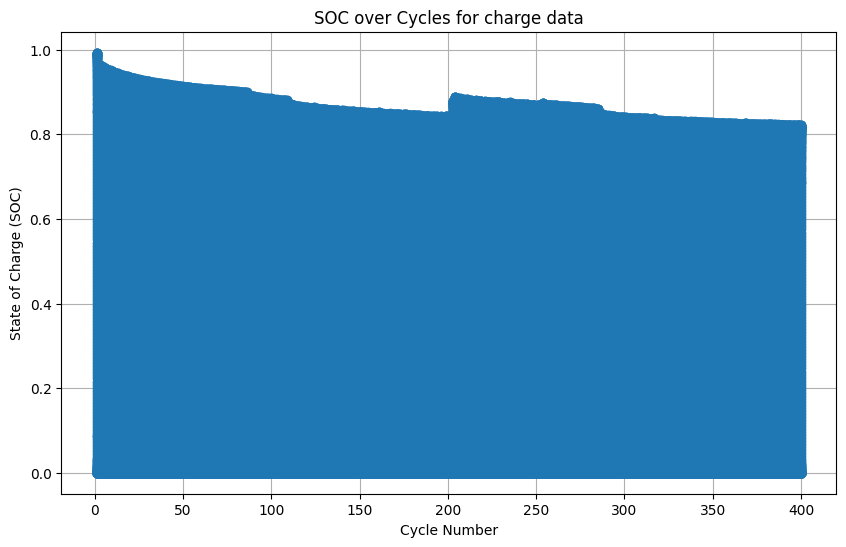

In [ ]:
# Calculate SOC for each cycle for charge data
charge_df['SOC'] = (charge_df['Capacity']/ rated_capacity)

# Visualization of the SOC over cycles
plt.figure(figsize=(10, 6))
plt.plot(charge_df['Cycle Number'], charge_df['SOC'], marker='o')
plt.xlabel("Cycle Number")
plt.ylabel("State of Charge (SOC)")
plt.title("SOC over Cycles for charge data")
plt.grid(True)
plt.show()

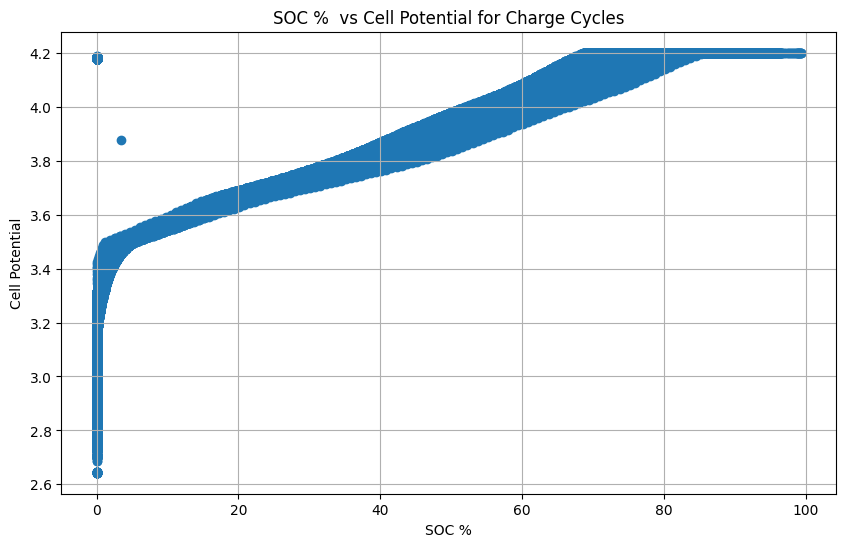

In [ ]:
# Visualization of cell potential vs. SOC for charge data
plt.figure(figsize=(10, 6))
plt.scatter(charge_df['SOC']*100,charge_df['Cell Potential'], marker='o')
plt.xlabel("SOC %")
plt.ylabel("Cell Potential")
plt.title("SOC %  vs Cell Potential for Charge Cycles")
plt.grid(True)
plt.show()

In [ ]:
# Calculate dQ/dV using numpy's gradient function

# For discharge data
discharge_df['dQ/dV'] = np.gradient(discharge_df['Capacity'], discharge_df['Cell Potential'])

# For charging data
charge_df['dQ/dV'] = np.gradient(charge_df['Capacity'], charge_df['Cell Potential'])

In [ ]:
discharge_df.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential,SOC,dQ/dV
0,0.000000,0.0,25.690142,0.000000,3.065919,NaN,-0.000000e+00
1,0.002778,0.0,25.690142,0.000000,3.065614,NaN,-6.340512e-07
2,0.002792,1.0,25.690142,0.000021,3.165103,0.000006,2.672402e-03
3,0.002836,1.0,25.690142,0.000087,3.186008,0.000025,3.124178e-03
4,2.785850,1.0,26.217327,0.000000,4.195849,0.000000,4.063848e-07


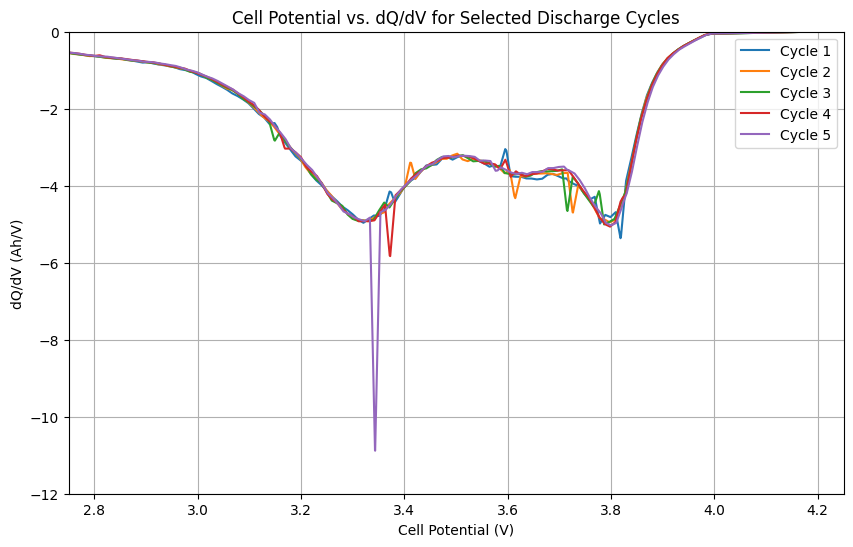

In [ ]:
# Visualization of dQ/dV vs. Cell Potential for discharge data
cycles_to_plot = [1.0, 2.0, 3.0, 4.0, 5.0]
plt.figure(figsize=(10, 6))

for cycle in cycles_to_plot:
    cycle_df = discharge_df[discharge_df['Cycle Number'] == cycle]  # Filter for the specific cycle
    if not cycle_df.empty:  # Check if the cycle data exists
        plt.plot(cycle_df['Cell Potential'], cycle_df['dQ/dV'], label=f'Cycle {int(cycle)}')
    else:
        print(f"Warning: Cycle {int(cycle)} not found in discharge_df")

plt.xlabel('Cell Potential (V)')
plt.ylabel('dQ/dV (Ah/V)')
plt.title('Cell Potential vs. dQ/dV for Selected Discharge Cycles')
plt.legend()
plt.grid(True)
plt.xlim(2.75, 4.25)
plt.ylim(-12,0)
plt.show()

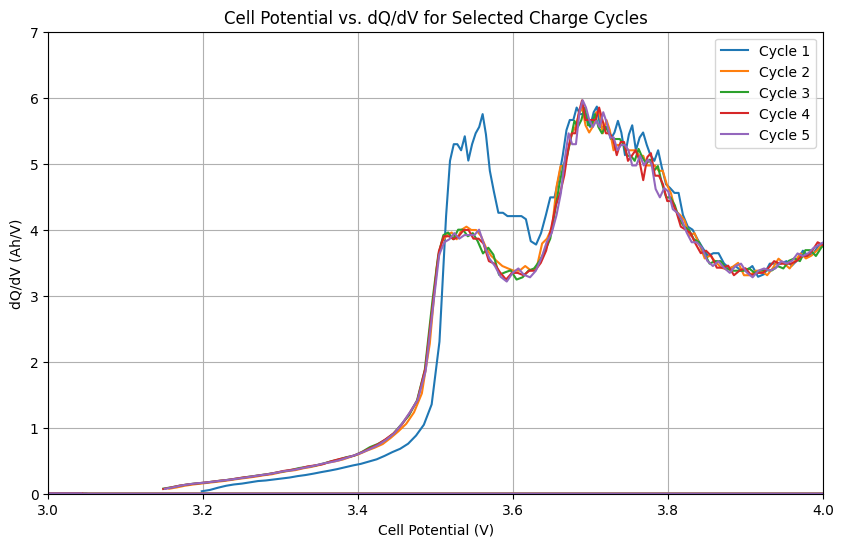

In [ ]:
# Visualization of dQ/dV vs. Cell Potential for charge data
cycles_to_plot = [1.0, 2.0, 3.0, 4.0, 5.0]
plt.figure(figsize=(10, 6))

for cycle in cycles_to_plot:
    cycle_df = charge_df[charge_df['Cycle Number'] == cycle]  # Filter for the specific cycle
    if not cycle_df.empty:  # Check if the cycle data exists
        plt.plot(cycle_df['Cell Potential'], cycle_df['dQ/dV'], label=f'Cycle {int(cycle)}')
    else:
        print(f"Warning: Cycle {int(cycle)} not found in charge_df")

plt.xlabel('Cell Potential (V)')
plt.ylabel('dQ/dV (Ah/V)')
plt.title('Cell Potential vs. dQ/dV for Selected Charge Cycles')
plt.legend()
plt.grid(True)
plt.xlim(3, 4)
plt.ylim(0,7) #Adjust Y limits if needed
plt.show()

In [ ]:
# Another way to calculate dQ/dV maybe inaccurate
discharge_df['dQ'] = discharge_df['Capacity'].diff()
discharge_df['dV'] = discharge_df['Cell Potential'].diff()
discharge_df['dQ/dV'] = discharge_df['dQ'] / discharge_df['dV']
discharge_df.loc[discharge_df['dV'] == 0, 'dQ/dV'] = np.nan # Handle division by zero
discharge_df.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential,SOC,dQ/dV,dQ,dV
0,0.000000,0.0,25.690142,0.000000,3.065919,NaN,NaN,NaN,NaN
1,0.002778,0.0,25.690142,0.000000,3.065614,NaN,-0.000000,0.000000,-0.000305
2,0.002792,1.0,25.690142,0.000021,3.165103,0.000006,0.000206,0.000021,0.099489
3,0.002836,1.0,25.690142,0.000087,3.186008,0.000025,0.003191,0.000067,0.020905
4,2.785850,1.0,26.217327,0.000000,4.195849,0.000000,-0.000086,-0.000087,1.009842


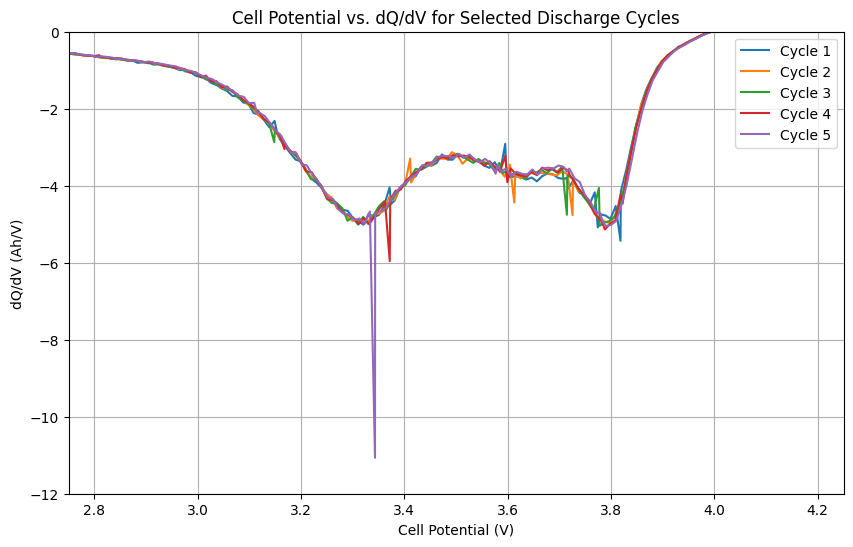

In [ ]:
# Visualization of dQ/dV vs. Cell Potential for the discharge data
cycles_to_plot = [1.0, 2.0, 3.0, 4.0, 5.0]
plt.figure(figsize=(10, 6))

for cycle in cycles_to_plot:
    cycle_df = discharge_df[discharge_df['Cycle Number'] == cycle]  # Filter for the specific cycle
    if not cycle_df.empty:  # Check if the cycle data exists
        plt.plot(cycle_df['Cell Potential'], cycle_df['dQ/dV'], label=f'Cycle {int(cycle)}')
    else:
        print(f"Warning: Cycle {int(cycle)} not found in discharge_df")

plt.xlabel('Cell Potential (V)')
plt.ylabel('dQ/dV (Ah/V)')
plt.title('Cell Potential vs. dQ/dV for Selected Discharge Cycles')
plt.legend()
plt.grid(True)
plt.xlim(2.75, 4.25)
plt.ylim(-12,0)
plt.show()

In [ ]:
# Another way to calculate dQ/dV maybe inaccurate
charge_df['dQ'] = charge_df['Capacity'].diff()
charge_df['dV'] = charge_df['Cell Potential'].diff()
charge_df['dQ/dV'] = charge_df['dQ'] / charge_df['dV']
charge_df.loc[charge_df['dV'] == 0, 'dQ/dV'] = np.nan # Handle division by zero
charge_df.head()

,Test Time,Cycle Number,Temp,Capacity,Cell Potential,SOC,dQ/dV,dQ,dV
0,0.002917,1.0,25.690142,0.000208,3.198215,0.000059,NaN,NaN,NaN
1,0.003178,1.0,25.690142,0.000600,3.208743,0.000171,0.037203,0.000392,0.010529
2,0.003711,1.0,25.690142,0.001400,3.219120,0.000400,0.077090,0.000800,0.010376
3,0.004450,1.0,25.706116,0.002508,3.229648,0.000717,0.105265,0.001108,0.010529
4,0.005358,1.0,25.690142,0.003870,3.239719,0.001106,0.135291,0.001362,0.010071


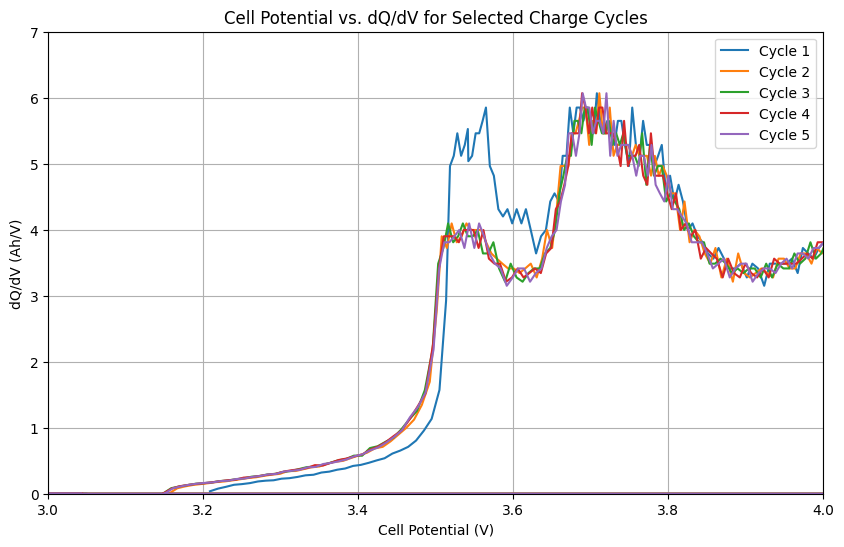

In [ ]:
# Visualization of dQ/dV vs. Cell Potential for the charge data
cycles_to_plot = [1.0, 2.0, 3.0, 4.0, 5.0]
plt.figure(figsize=(10, 6))

for cycle in cycles_to_plot:
    cycle_df = charge_df[charge_df['Cycle Number'] == cycle]  # Filter for the specific cycle
    if not cycle_df.empty:  # Check if the cycle data exists
        plt.plot(cycle_df['Cell Potential'], cycle_df['dQ/dV'], label=f'Cycle {int(cycle)}')
    else:
        print(f"Warning: Cycle {int(cycle)} not found in charge_df")

plt.xlabel('Cell Potential (V)')
plt.ylabel('dQ/dV (Ah/V)')
plt.title('Cell Potential vs. dQ/dV for Selected Charge Cycles')
plt.legend()
plt.grid(True)
plt.xlim(3, 4)
plt.ylim(0,7) #Adjust Y limits if needed
plt.show()